[1842.0, -10.9, -5.6, -4.8, 1.3, 10.7, 15.0, 19.7, 16.8, 10.6, 2.1, -1.3, -6.6, 3.9]
[-10.9  -5.6  -4.8   1.3  10.7  15.   19.7  16.8  10.6   2.1  -1.3  -6.6]


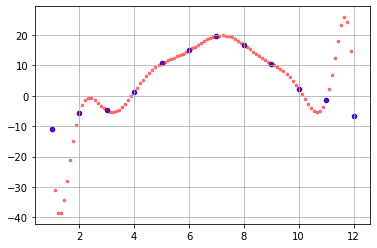

In [1]:
    import csv
    import numpy as np
    import matplotlib.pyplot as plt

    def lagranz(x,y,t):
        z=0
        for j in range(len(y)):
            p1=1; p2=1
            for i in range(len(x)):
                if i==j:
                    p1=p1*1; p2=p2*1   
                else: 
                    p1=p1*(t-x[i])
                    p2=p2*(x[j]-x[i])
            z=z+y[j]*p1/p2
        return z

    with open('10_NN.csv','r') as csv_file:
        csv_reader = csv.reader(csv_file)
        next(csv_reader)

        data = {}
        for line in csv_reader:
            key = int(line[0])
            #valuess = list(float(line[1].replace(',','.')),float(line[2].replace(',','.')),float(line[3].replace(',','.')))
            data[key] = []
            mean = 0
            for cnt, val1 in enumerate(line):
                val = float(val1.replace(',','.'))
                if val != 999.9:
                    mean = (mean+val)/(cnt+1) 
                    data[key].append(val)
                else:
                    data[key].append(mean)



    print(data[1842])

    x=np.array([1,2,3,4,5,6,7,8,9,10,11,12], dtype=float)
    y=np.array(data[1842][1:-1], dtype=float)
    plt.scatter(x,y,s=20, c='blue', marker="o")
    print(y)
    xnew=np.linspace(np.min(x),np.max(x),100)
    ynew=[lagranz(x,y,i) for i in xnew]

    plt.scatter(xnew,ynew,s=7, c='red', marker="o", alpha = 0.5)
    plt.grid(True)
    plt.show()

In [45]:
for x in range(12):
    print(data[1842+x])

[1842.0, -10.9, -5.6, -4.8, 1.3, 10.7, 15.0, 19.7, 16.8, 10.6, 2.1, -1.3, -6.6, 3.9]
[1843.0, -5.5, -1.5, -2.8, 2.1, 9.5, 18.8, 18.5, 16.7, 12.3, 7.5, -2.4, -5.7, 5.6]
[1844.0, -9.6, -8.8, -5.1, 2.6, 15.1, 16.1, 20.5, 18.0, 12.7, 3.3, -7.6, -12.2, 3.8]
[1845.0, -8.7, -14.7, -9.7, -1.1, 8.3, 12.8, 19.2, 17.7, 12.8, 2.9, -2.2, -10.0, 2.3]
[1846.0, -11.3, -12.4, -5.4, 1.8, 15.172500000000003, 16.1, 20.7, 16.3, 10.4, 4.4, -5.3, -11.6, -0.922985975540663]
[1847.0, -13.4, -9.4, -9.7, 0.6, 10.7, 18.9, 19.0, 21.0, 18.2, 5.4, -1.9, -12.1, 3.9]
[1848.0, -20.6, -7.2, -3.6, 8.6, 11.5, 18.3, 21.1, 17.9, 14.7, 4.3, -2.9, -14.0, 4.0]
[1849.0, -16.7, -7.5, -3.1, 2.7, 9.9, 16.4, 22.4, 17.4, 10.4, 4.0, -2.9, -11.2, 3.5]
[1850.0, -18.1, -10.6, -5.6, 0.1, 11.4, 18.0, 19.2, 20.7, 10.3, 0.2, -1.7, -6.8, 3.1]
[1851.0, -11.1, -14.4, -8.9, 2.6, 11.8, 15.8, 20.0, 17.7, 17.5, 4.8, 2.0, -5.9, 4.3]
[1852.0, -12.4, -10.6, -4.5, 0.0, 9.6, 17.1, 14.9, 17.5, 11.3, 1.0, -7.6, -7.8, 2.4]
[1853.0, -9.8, -8.6, -6.8, 2.9, 

In [8]:
def nuton(y,l,x):
    p = y[0]
    mnoj = 1
    for i in range(1,7):
        mnoj *= x-i
        p += l[i]*mnoj
    return p

def rr1(l):
    ans = []
    for i,x in enumerate(l[:-1]):
        ans.append(l[i]-l[i+1])
    return ans

    

In [9]:
l = []
ans = []
c = 2
import numpy as np
for x in range(6):
    l.append(data[1842+x][1])
for x in range(6):
    ans.append(l)
    l = rr1(l)
for x in ans:
    print(x)

[-10.9, -5.5, -9.6, -8.7, -11.3, -13.4]
[-5.4, 4.1, -0.9000000000000004, 2.6000000000000014, 2.0999999999999996]
[-9.5, 5.0, -3.5000000000000018, 0.5000000000000018]
[-14.5, 8.500000000000002, -4.0000000000000036]
[-23.0, 12.500000000000005]
[-35.50000000000001]


In [10]:
x1=np.array([0,1,2,3,4,5], dtype=float)
y1=np.array(ans[0], dtype=float)
#print(x1,y1)
t = []
for x in ans:
    t.append(x[0])
#for x in range(2,6):
#    t[x]/=x
#print(t)



xn=np.arange(np.min(x1),np.max(x1),0.1)
yn=[nuton(y1,t,i) for i in xn]
#print(yn)
plt.scatter(xn,yn,s=7, c='red', marker="o", alpha = 0.5)
plt.scatter(x1,y1,s=20, c='blue', marker="o")
plt.grid(True)
plt.show()

IndexError: list index out of range